In [1]:
# Importing libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading data
data_train = pd.read_csv('/content/drive/MyDrive/MNIST/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/MNIST/test.csv')

data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Loading data into an array
data_train = np.array(data_train)
data_test = np.array(data_test)

m, n = data_train.shape
a,b = data_test.shape

#Shuffling the data to create randomness
np.random.shuffle(data_train)
np.random.shuffle(data_test)

print(m,n,a,b)

42000 785 28000 784


In [5]:
training_data = data_train[0:m, :]
validation_data = data_test[0:a, :]

X_train = training_data[:, 1:].T
X_train = X_train / 255.0
Y_train = training_data[:, 0]

X_val = validation_data[:, :].T
X_val = X_val / 255.0
Y_val = validation_data[:, 0]

print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)

(784, 28000)
(28000,)
(784, 42000)
(42000,)


In [11]:
def initialize_parameters(): #Putting random numbers to initialize the parameters for the first iteration
  W1 = np.random.rand(10, 784) - 0.5
  B1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  B2 = np.random.rand(10, 1) - 0.5
  return W1, B1, W2, B2

def ReLU(X): # First activation function
  return np.maximum(X, 0)

def softmax(Z): # Second activation function
  return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, B1, W2, B2, X): # Forward prop
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot_converter(Y): # One hot vectorization
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

def backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y): # Backward prop
  one_hot_Y = one_hot_converter(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
  W1 = W1 - learning_rate * dW1
  B1 = B1 - learning_rate * dB1
  W2 = W2 - learning_rate * dW2
  B2 = B2 - learning_rate * dB2
  return W1, B1, W2, B2

def cross_entropy_loss(A2, Y): # Our loss function
  m = Y.shape[0]
  one_hot_Y = one_hot_converter(Y)
  # Avoiding log(0) by adding a small epsilon
  epsilon = 1e-10
  loss = -np.mean(np.sum(one_hot_Y * np.log(A2 + epsilon), axis=0))
  return loss

def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y): # Checks if predicted output is correct and adds them to the counter
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations): # Gradient descent
  W1, B1, W2, B2 = initialize_parameters()

  iteration_list = []
  accuracy_list = []
  loss_list = []


  for i in range(1,iterations+1):
    Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X)
    dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
    W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)

    loss = cross_entropy_loss(A2, Y)

    if (i%75)==0:

      iteration_list.append(i)
      loss_list.append(loss) # Updating arrays that is used for plotting
      accuracy_list.append(get_accuracy(get_predictions(A2), Y))

      print("Iteration number: ", i)
      print("Loss: ", loss)
      print("Accuracy = ", get_accuracy(get_predictions(A2), Y))
      print('\n')


  return W1, B1, W2, B2 , iteration_list, loss_list, accuracy_list



In [12]:
  # Running our model
  W1, B1, W2, B2, iterations_for_plot, losses_for_plot, accuracies_for_plot = gradient_descent(X_train, Y_train, 0.1, 750)

  # learning rate = 0.1
  # iterations = 750

Iteration number:  75
Loss:  1.4122340726516147
Accuracy =  0.5328809523809523


Iteration number:  150
Loss:  0.9037253167578723
Accuracy =  0.7042619047619048


Iteration number:  225
Loss:  0.7222487572885246
Accuracy =  0.7687380952380952


Iteration number:  300
Loss:  0.6272608019333814
Accuracy =  0.8035714285714286


Iteration number:  375
Loss:  0.5673770393847789
Accuracy =  0.8248571428571428


Iteration number:  450
Loss:  0.5260235565016151
Accuracy =  0.84


Iteration number:  525
Loss:  0.4954419357993377
Accuracy =  0.8508095238095238


Iteration number:  600
Loss:  0.4717416422355262
Accuracy =  0.8591190476190477


Iteration number:  675
Loss:  0.45265417729534013
Accuracy =  0.8646666666666667


Iteration number:  750
Loss:  0.43669892582328057
Accuracy =  0.8695714285714286




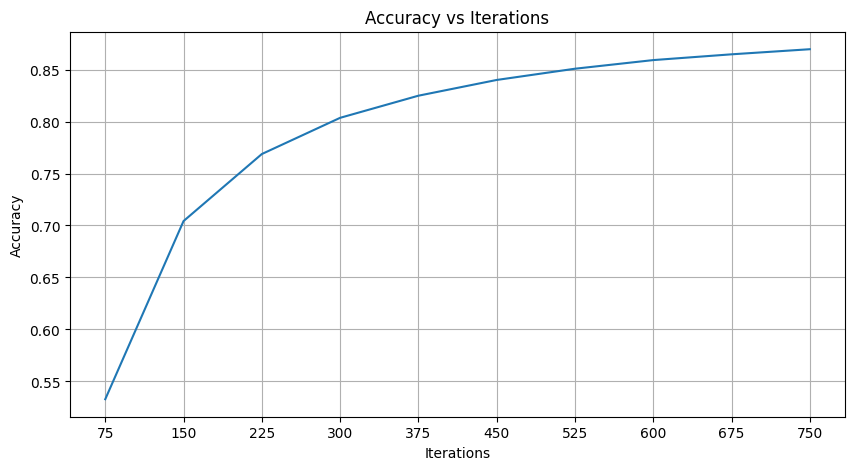

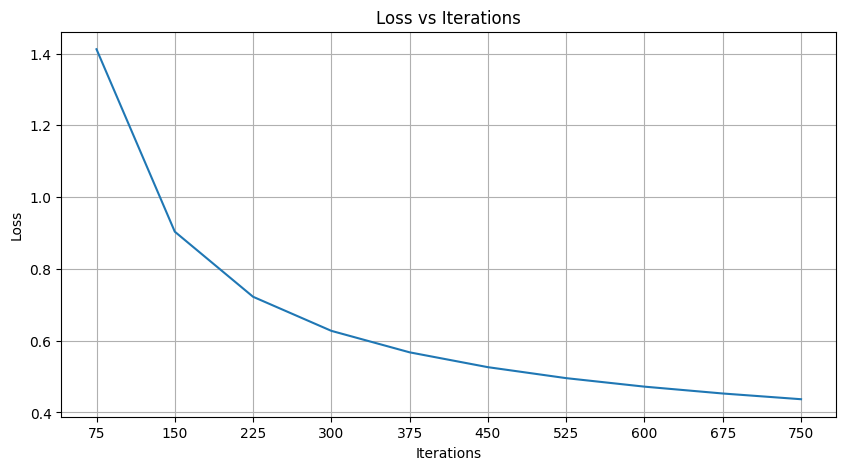

In [13]:

# Plot Accuracy vs Iterations
plt.figure(figsize=(10, 5))
plt.plot(iterations_for_plot, accuracies_for_plot)
plt.title('Accuracy vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.xticks(np.arange(75, 751, 75))
plt.grid(True)
plt.show()

# Plot Loss vs Iterations
plt.figure(figsize=(10, 5))
plt.plot(iterations_for_plot, losses_for_plot)
plt.title('Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.xticks(np.arange(75, 751, 75))
plt.grid(True)
plt.show()
